In [2]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.8/39.5 MB 1.5 MB/s eta 0:00:27
   - -------------------------------------- 1.0/39.5 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.3/39.5 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.6/39.5 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.8/39.5 MB 1.4 MB/s eta 0:00:28
   -- ------------------------------------- 2.1/39.5 MB 1.4 MB/s eta 0:00:28
   -- ------------------------------------- 2.6/39.5 MB 1.4 MB/s eta 0:00:27
   -- ------------------------------------- 2.9/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------------------------------------ 3.1/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------------------------------------ 3.4/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\avins\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
#import library
import cv2 #opencv image
import numpy as np #array 
import string
import os
import matplotlib.pyplot as plt

In [13]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)}  #character to ascii  
c={i:chr(i) for i in range(255)}  #ascii to caharacter

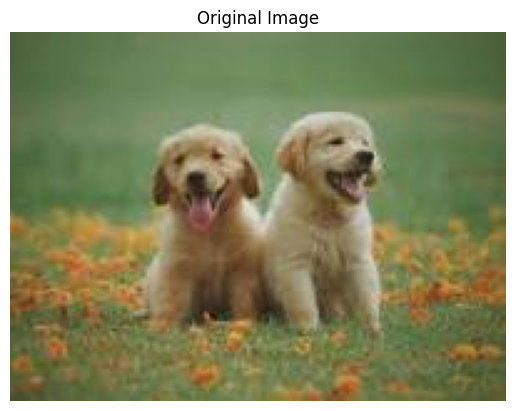

In [14]:
# Load the image
image = cv2.imread('download.jpeg')

if image is None:
    print("Image not found or path is incorrect")
else:
    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert BGR to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Show the original image using matplotlib
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


In [20]:
x = cv2.imread('download.jpeg')

# Check if image loaded correctly
if x is None:
    print("Error: Image not found or path is incorrect.")
else:
    print("Image shape:", x.shape)  # This will now work
    x_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)




Image shape: (148, 199, 3)


In [21]:
key="123"
text="secret"

In [22]:
# ASCII Values
text_ascii=[d[ch] for ch in text]  #list of ascii values of text characters
key_ascii=[d[ch] for ch in key]    #list of ascii values of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [23]:
#encrypt using pixel modelfication
x_enc=x.copy()
n=0  #number of rows
m=0  #number of coloumns
z=0  #colour panel
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]  #important
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
    

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0,0) [original=58]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2,1) [original=97]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1,2) [original=78]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3,0,0) [original=58]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4,2,1) [original=98]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5,1,2) [original=76]


In [24]:
cv2.imwrite("encrypt.jpg",x_enc)

True

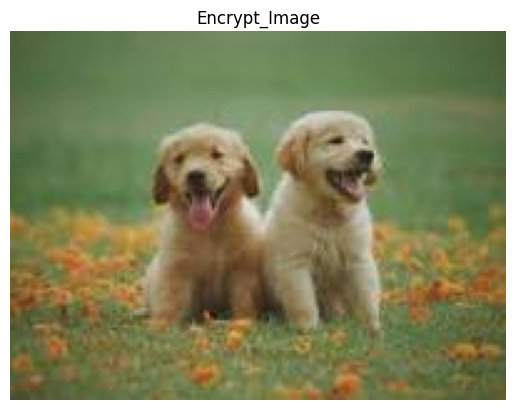

In [25]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

In [26]:
#Decrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key[kl]]]
    decrypt=decrypt+orig_char

    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")

    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)
    

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 = 116 -> 't'
secret
